
#### M. Zhafir Zaydan 21.11.3913


# Analisis Cuaca London
London Weather Data merupakan kumpulan data yang dibuat dengan merekonsiliasi pengukuran dari permintaan atribut cuaca individual yang disediakan oleh European Climate Assessment (ECA). Pengukuran kumpulan data khusus ini direkam oleh stasiun cuaca di dekat bandara Heathrow di London, Inggris. Berikut ini fitur yang dimiliki:

# Tujuan Analisis

Tujuan dari analisis ini adalah untuk menentukan faktor-faktor yang secara signifikan memengaruhi suhu maksimum di London dan mengembangkan model regresi yang secara akurat memprediksi suhu maksimum berdasarkan variabel-variabel yang dipilih.

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Membaca Dataset

In [2]:
df = pd.read_csv('london_weather.csv')

### Menampilkan Isi Dataset

In [3]:
df

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8   

       min_temp  precipitation  pressure  snow_depth  
0          -7.5            0.4  101900.0         9.0  
1          -7.5            0.0  102530.0         8.0  
2          -7.2            0.0  102050.0         4.0  
3          -6.5            0.0  100840.0         2.0  
4          -1.4            0.0  102250.0         1.0  
...         ...            ...       ...         ...  
15336       7.6            2.0   98000.0         NaN  
15337      -1.3            0.2   97370.0         NaN  
15338       1.1            0.0   98830.0         NaN  
15339      -0.1            0.0  100200.0         NaN  
15340      -3.1            0.0  100500.0         NaN  

[15341 rows x 10 columns]

In [4]:
df.index

RangeIndex(start=0, stop=15341, step=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
df.describe()

date   cloud_cover      sunshine  global_radiation  \
count  1.534100e+04  15322.000000  15341.000000      15322.000000   
mean   1.999567e+07      5.268242      4.350238        118.756951   
std    1.212176e+05      2.070072      4.028339         88.898272   
min    1.979010e+07      0.000000      0.000000          8.000000   
25%    1.989070e+07      4.000000      0.500000         41.000000   
50%    2.000010e+07      6.000000      3.500000         95.000000   
75%    2.010070e+07      7.000000      7.200000        186.000000   
max    2.020123e+07      9.000000     16.000000        402.000000   

           max_temp     mean_temp      min_temp  precipitation       pressure  \
count  15335.000000  15305.000000  15339.000000   15335.000000   15337.000000   
mean      15.388777     11.475511      7.559867       1.668634  101536.605594   
std        6.554754      5.729709      5.326756       3.738540    1049.722604   
min       -6.200000     -7.600000    -11.800000       0.000000   95960.000000   
25%       10.500000      7.000000      3.500000       0.000000  100920.000000   
50%       15.000000     11.400000      7.800000       0.000000  101620.000000   
75%       20.300000     16.000000     11.800000       1.600000  102240.000000   
max       37.900000     29.000000     22.300000      61.800000  104820.000000   

         snow_depth  
count  13900.000000  
mean       0.037986  
std        0.545633  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       22.000000

##### Dataset London Weather terdapat:
Baris data : 15341 rows
Kolom data : 10 columns

### Pembersihan Data

In [7]:
# Cek Missing Value
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [8]:
# Menghapus Missing Value
df.dropna(axis=0,inplace=True)

In [9]:
# Setelah itu kita melihat kembali apakah missing value sudah terhapus
df.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [10]:
# Cek kembali Baris dan Kolom Data
df.shape

(13843, 10)

##### Dataset London Weather setelah di permbersihan data:
Baris data : 13843 rows Kolom data : 10 columns

### Mengkonversi Format Data

In [11]:
# Mengonversi kolom 'tanggal' ke format datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
print(df.dtypes)

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object


### Menangani Outlier

In [12]:
# Hitung skor-Z untuk setiap kolom
z_scores = (df[['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']] - df[['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']].mean()) / df[['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']].std()

# Menentukan ambang batas untuk deteksi oulier
outlier_threshold = 3

# Mengganti outliear dengan nilai ambang batas
df[['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']] = np.where(np.abs(z_scores) > outlier_threshold, 
df[['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']].mean(), 
df[['max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']])

In [13]:
df.dtypes

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object

In [14]:
df.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [15]:
df.describe()

cloud_cover      sunshine  global_radiation      max_temp  \
count  13843.00000  13843.000000      13843.000000  13843.000000   
mean       5.32818      4.262609        114.529148     14.941224   
std        2.03417      3.987488         87.758136      6.487790   
min        0.00000      0.000000         12.000000     -4.000000   
25%        4.00000      0.400000         39.000000     10.200000   
50%        6.00000      3.400000         89.000000     14.400000   
75%        7.00000      7.100000        180.000000     19.700000   
max        9.00000     15.700000        352.000000     34.400000   

          mean_temp      min_temp  precipitation       pressure    snow_depth  
count  13843.000000  13843.000000   13843.000000   13843.000000  13843.000000  
mean      11.084160      7.220847       1.281621  101555.682334      0.037853  
std        5.690834      5.305769       2.397053    1036.052826      0.545712  
min       -5.400000     -8.500000       0.000000   98370.000000      0.000000  
25%        6.800000      3.200000       0.000000  100920.000000      0.000000  
50%       10.800000      7.300000       0.000000  101630.000000      0.000000  
75%       15.500000     11.400000       1.600000  102260.000000      0.000000  
max       27.800000     22.300000      12.800000  104430.000000     22.000000

### EDA

In [16]:
import plotly.express as px
import plotly.graph_objects as go

# Descriptive Statistics
descriptive_stats = df.describe()
print(descriptive_stats)

       cloud_cover      sunshine  global_radiation      max_temp  \
count  13843.00000  13843.000000      13843.000000  13843.000000   
mean       5.32818      4.262609        114.529148     14.941224   
std        2.03417      3.987488         87.758136      6.487790   
min        0.00000      0.000000         12.000000     -4.000000   
25%        4.00000      0.400000         39.000000     10.200000   
50%        6.00000      3.400000         89.000000     14.400000   
75%        7.00000      7.100000        180.000000     19.700000   
max        9.00000     15.700000        352.000000     34.400000   

          mean_temp      min_temp  precipitation       pressure    snow_depth  
count  13843.000000  13843.000000   13843.000000   13843.000000  13843.000000  
mean      11.084160      7.220847       1.281621  101555.682334      0.037853  
std        5.690834      5.305769       2.397053    1036.052826      0.545712  
min       -5.400000     -8.500000       0.000000   98370.000000    

In [17]:
# Data Distribution
fig = px.histogram(df, x='max_temp', nbins=20)
fig.show()

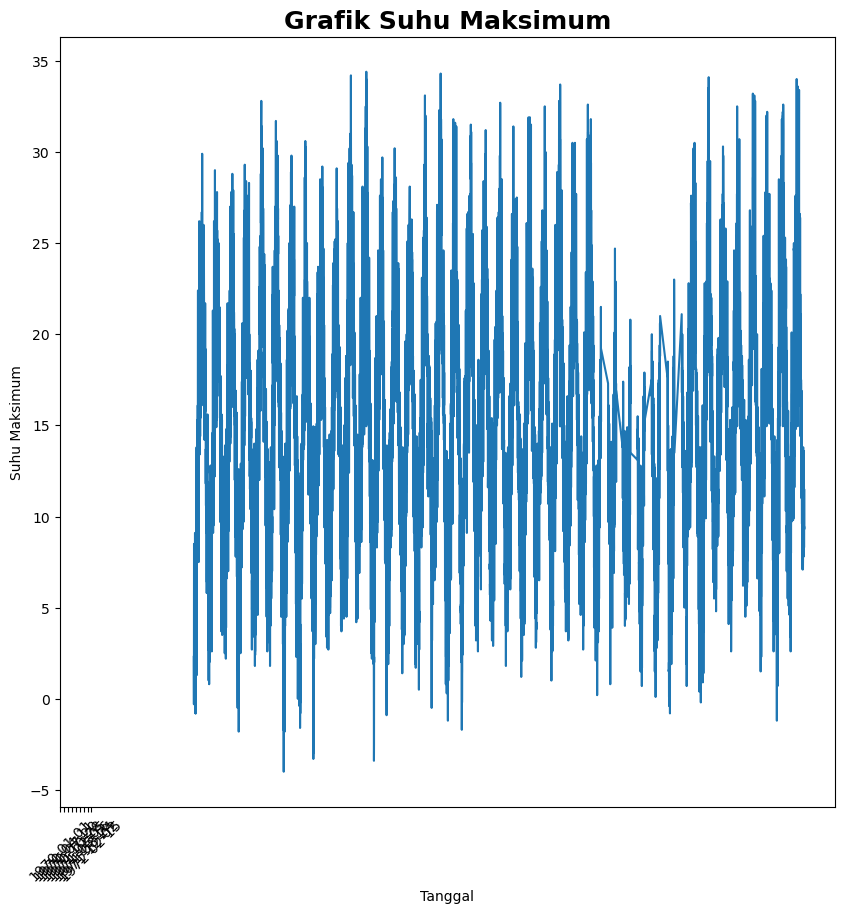

In [18]:
#Membuat Line graph
plt.figure(figsize=(10, 10))
plt.plot(df['date'],df['max_temp'])
plt.title('Grafik Suhu Maksimum', fontweight='bold',fontsize=18)
plt.xlabel('Tanggal')
plt.ylabel('Suhu Maksimum')
plt.xticks(rotation = 45,fontsize=10)
plt.xticks([0, 100,200,300,400,500,600,700,775])
plt.show()

### Analisis Korelasi

In [19]:
#Analisa Korelasi
corr = df.corr()
corr

C:\Users\MSI DRAGON\AppData\Local\Temp\ipykernel_25884\2130509516.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



cloud_cover  sunshine  global_radiation  max_temp  \
cloud_cover          1.000000 -0.734598         -0.466202 -0.181130   
sunshine            -0.734598  1.000000          0.851249  0.465985   
global_radiation    -0.466202  0.851249          1.000000  0.685451   
max_temp            -0.181130  0.465985          0.685451  1.000000   
mean_temp           -0.083632  0.396616          0.634657  0.904139   
min_temp             0.070951  0.222068          0.479724  0.803448   
precipitation        0.250169 -0.254070         -0.187241 -0.099858   
pressure            -0.235625  0.214981          0.136042  0.089012   
snow_depth          -0.001365 -0.033778         -0.061488 -0.130442   

                  mean_temp  min_temp  precipitation  pressure  snow_depth  
cloud_cover       -0.083632  0.070951       0.250169 -0.235625   -0.001365  
sunshine           0.396616  0.222068      -0.254070  0.214981   -0.033778  
global_radiation   0.634657  0.479724      -0.187241  0.136042   -0.061488  
max_temp           0.904139  0.803448      -0.099858  0.089012   -0.130442  
mean_temp          1.000000  0.953743      -0.048898 -0.005363   -0.153891  
min_temp           0.953743  1.000000      -0.004488 -0.080460   -0.136860  
precipitation     -0.048898 -0.004488       1.000000 -0.378878   -0.008004  
pressure          -0.005363 -0.080460      -0.378878  1.000000   -0.021909  
snow_depth        -0.153891 -0.136860      -0.008004 -0.021909    1.000000

<Axes: >

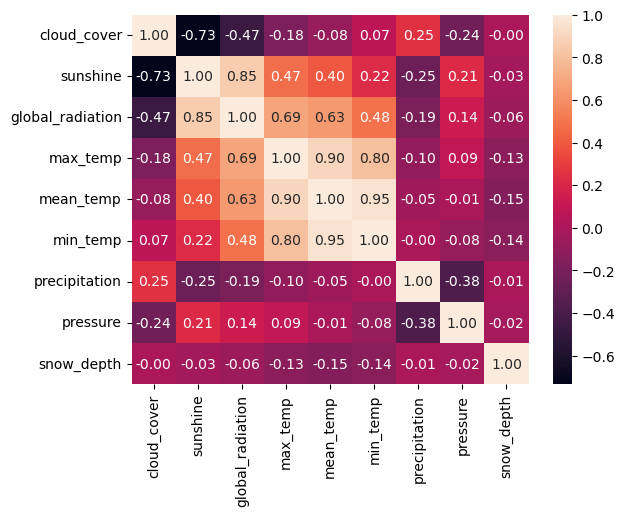

In [20]:
#Analisa Korelasi menggunakan heat map
sns.heatmap(corr,annot=True, fmt='.2f')

<Axes: >

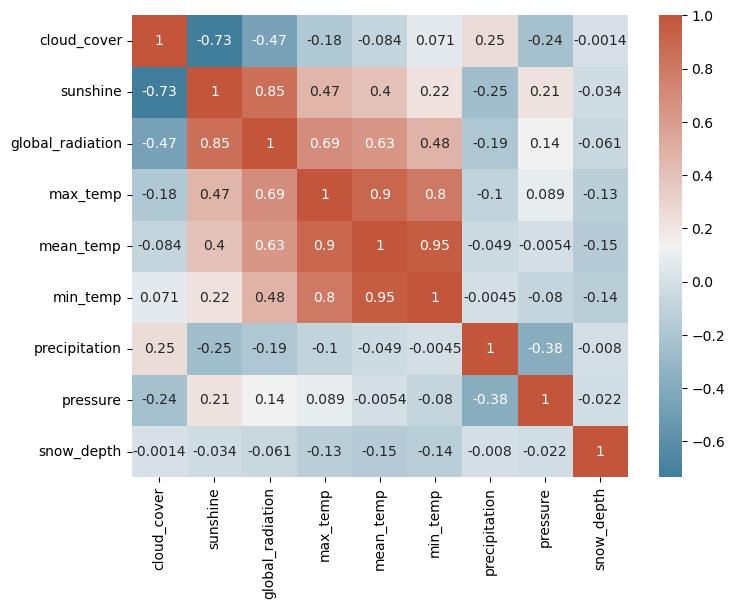

In [21]:
plt.subplots(figsize=(8,6))
color = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=color)

<Axes: >

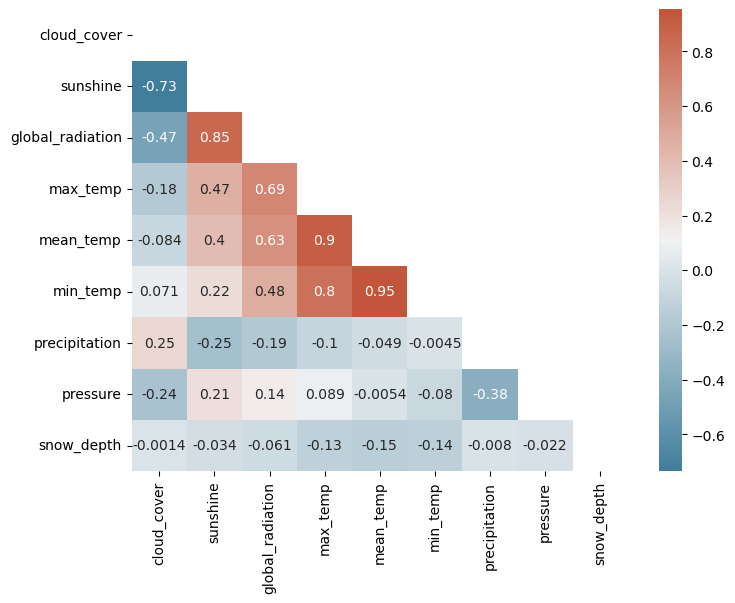

In [22]:
plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
color = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=color, mask=mask)

C:\Users\MSI DRAGON\AppData\Local\Temp\ipykernel_25884\3062646656.py:6: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



<Figure size 640x480 with 0 Axes>

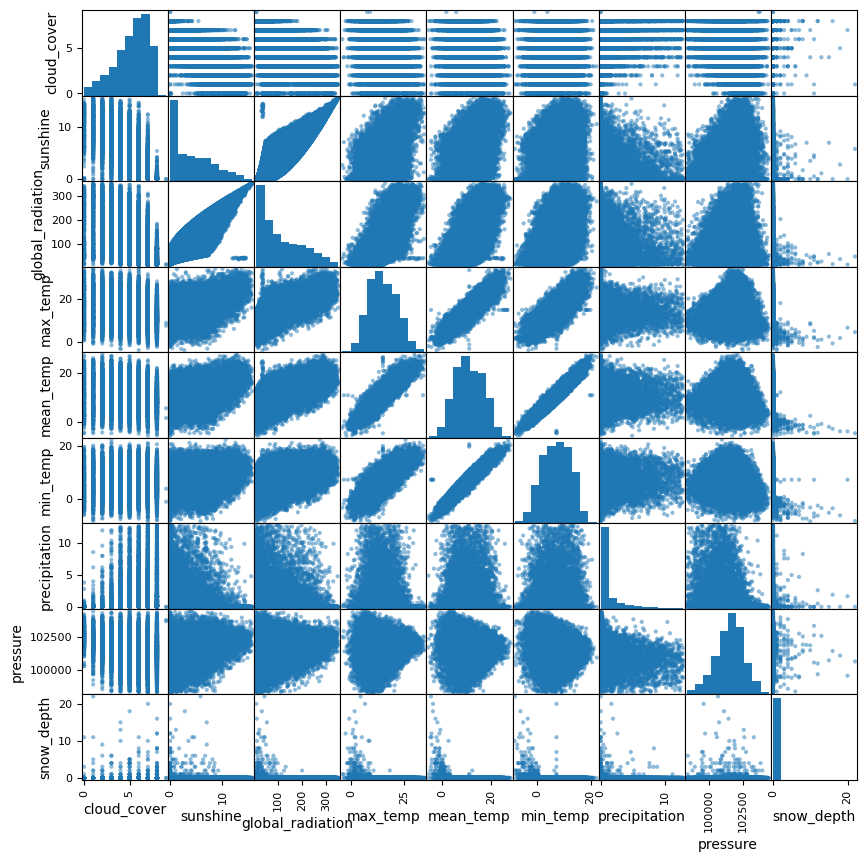

In [23]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.clf()

_, ax = plt.subplots(1, 1, figsize=(10,10))
scatter_matrix(df, ax=ax)
plt.show()

### Regresi Linear

In [24]:
# Membagi var independen x dan y
x = df[['cloud_cover', 'sunshine', 'global_radiation','precipitation','pressure','snow_depth']]
y = df['max_temp']
print(x.shape)
print(y.shape)

(13843, 6)
(13843,)


### Split Data dengan perbandingan train dan testing 70 : 30

In [25]:
#Membagi data menjadi data train dan data test dengan perbandingan 70 : 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=70)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9690, 6)
(9690,)
(4153, 6)
(4153,)


In [26]:
regr = LinearRegression()
regr.fit(x_train, y_train)
LinearRegression()

LinearRegression()

In [27]:
# mendapatkan nilai coef & intercept
print('Intercept: ', regr.intercept_)
print('Coef: ', regr.coef_)

Intercept:  -11.422023738149013
Coef:  [-4.93223718e-02 -7.34072884e-01  7.76392859e-02  2.44957978e-03
  2.05960183e-04 -8.40121575e-01]


In [28]:
# Persamaan
# y = -4.932*cloud_cover - 7.3407*sunshine + 7.764*global_radiation + 2.4496*precipitation
#     + 2.0596*pressure - 8.4012*snow_depth - 11.422

In [29]:
# Menampilkan hasil prediksi
pred = regr.predict(x_test)
print(pred)
print(y_test)

[11.7303778  11.90709411 11.14045538 ... 15.93510656 22.30427933
 21.66417614]
787       6.8
422       9.4
2221     11.7
2778     20.9
12089     4.1
         ... 
850      10.6
10207    11.7
5374     21.0
144      15.5
1241     13.9
Name: max_temp, Length: 4153, dtype: float64


In [30]:
pred = regr.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [31]:
rmse

4.442904749155971

#### Pembanding dengan 3 variabel

In [32]:
# Perbandingan ini menggunakan pembanding berbeda jumlah variabel bebas(x)
# menggunakan 3 variabel dengan variabel dengan nilai korelasi lebih dari 0.02 dan kurang dari 1.00

In [33]:
# Membagi var independen x yang lebih dari 0.02 ('sunshine','global_radiation','pressure') dan 
# variabel dependent (y) tetap max_temp
X2 = df[['sunshine','global_radiation','pressure']]
y2 = df['max_temp']
print(X2.shape)
print(y2.shape)

(13843, 3)
(13843,)


In [34]:
#Data tetap dibagi menjadi data train dan data test dengan perbandingan 70 : 30
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=70)
print(X2_train.shape)
print(y_train.shape)
print(X2_test.shape)
print(y_test.shape)

(9690, 3)
(9690,)
(4153, 3)
(4153,)


In [35]:
regr2 = LinearRegression()
regr2.fit(X2_train, y2_train)

LinearRegression()

In [36]:
# Menampilkan nilai coef & intercept
print('Coef :', regr2.coef_)
print('Intercept :', regr2.intercept_)

Coef : [-7.15653719e-01  7.77546411e-02  2.21516152e-04]
Intercept : -13.387196771767895


In [37]:
# Persamaan
# y = -7.1565*sunshine + 7.775*global_radiation + 2.215*pressure - 13.387

In [38]:
pred2 = regr2.predict(X2_test) 
print(pred2)
print(y2_test)


[11.65970871 11.95011886 11.03486837 ... 15.98400976 22.3218258
 21.66683315]
787       6.8
422       9.4
2221     11.7
2778     20.9
12089     4.1
         ... 
850      10.6
10207    11.7
5374     21.0
144      15.5
1241     13.9
Name: max_temp, Length: 4153, dtype: float64


In [39]:
mse2 = metrics.mean_squared_error(np.array(y2_test), 
pred2)
rmse2 = np.sqrt(mse2)
print(rmse2)

4.47527987792596


### Split Data dengan perbandingan train dan testing 80 : 20

In [40]:
# Membagi var independen x dan y
x = df[['cloud_cover', 'sunshine', 'global_radiation','precipitation','pressure','snow_depth']]
y = df['max_temp']
print(x.shape)
print(y.shape)

(13843, 6)
(13843,)


In [41]:
#Membagi data menjadi data train dan data test dengan perbandingan 80 : 20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=70)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11074, 6)
(11074,)
(2769, 6)
(2769,)


In [42]:
regr = LinearRegression()
regr.fit(x_train, y_train)
LinearRegression()

LinearRegression()

In [43]:
# mendapatkan nilai coef & intercept
print('Intercept: ', regr.intercept_)
print('Coef: ', regr.coef_)

Intercept:  -13.552184201099
Coef:  [-3.78259444e-02 -7.30950037e-01  7.77695296e-02 -1.28598773e-03
  2.26001313e-04 -8.73088004e-01]


In [44]:
# Persamaan
# y = -3.783*cloud_cover - 7.3095*sunshine + 7.777*global_radiation - 1.286*precipitation
#     + 2.260*pressure - 8.730*snow_depth - 13.552

In [45]:
# Menampilkan hasil prediksi
pred = regr.predict(x_test)
print(pred)
print(y_test)

[11.72812062 11.94719952 11.12224669 ... 14.76282662 10.04933165
 16.57251118]
787       6.8
422       9.4
2221     11.7
2778     20.9
12089     4.1
         ... 
421       6.8
9912      7.3
4277     22.6
12406    10.2
13970    16.5
Name: max_temp, Length: 2769, dtype: float64


In [46]:
pred = regr.predict(x_test)
rmse3 = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

In [47]:
rmse3

4.453313492166788

#### Pembanding dengan 3 variabel 

In [48]:
# Membagi var independen x yang lebih dari 0.2 ('sunshine','global_radiation','pressure') dan 
# variabel dependent (y) tetap max_temp
X2 = df[['sunshine','global_radiation','pressure']]
y2 = df['max_temp']
print(X2.shape)
print(y2.shape)

(13843, 3)
(13843,)


In [49]:
#Data tetap dibagi menjadi data train dan data test dengan perbandingan 80 : 20
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=70)
print(X2_train.shape)
print(y_train.shape)
print(X2_test.shape)
print(y_test.shape)

(11074, 3)
(11074,)
(2769, 3)
(2769,)


In [50]:
regr2 = LinearRegression()
regr2.fit(X2_train, y2_train)

LinearRegression()

In [51]:
# Menampilkan nilai coef & intercept
print('Coef :', regr2.coef_)
print('Intercept :', regr2.intercept_)

Coef : [-7.18537167e-01  7.80273957e-02  2.44565477e-04]
Intercept : -15.758364338436582


In [52]:
# Persamaan
# y = -7.185*sunshine + 7.8027*global_radiation + 2.446*pressure - 15.758

In [53]:
pred2 = regr2.predict(X2_test) 
print(pred2)
print(y2_test)

[11.66020157 11.97301182 11.02563192 ... 14.68465743 10.03804517
 16.56259566]
787       6.8
422       9.4
2221     11.7
2778     20.9
12089     4.1
         ... 
421       6.8
9912      7.3
4277     22.6
12406    10.2
13970    16.5
Name: max_temp, Length: 2769, dtype: float64


In [54]:
mse2 = metrics.mean_squared_error(np.array(y2_test), 
pred2)
rmse4 = np.sqrt(mse2)
print(rmse4)

4.48741515983159


In [55]:
print('Perbandingan menggunakan semua variabel bebas variabel dengan 3 variabel')
print("6 Variabel , split 70:30 = ",rmse);
print("3 variabel , split 70:30 = ",rmse2);
print("6 variabel , split 80:20 = ",rmse3);
print("3 variabel , split 80:20 = ",rmse4);

Perbandingan menggunakan semua variabel bebas variabel dengan 3 variabel
6 Variabel , split 70:30 =  4.442904749155971
3 variabel , split 70:30 =  4.47527987792596
6 variabel , split 80:20 =  4.453313492166788
3 variabel , split 80:20 =  4.48741515983159
